In [1]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#label_encoder = preprocessing.LabelEncoder()
#from category_encoders import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
!pip install category_encoders
#Import OneHoteEncoder
from category_encoders import OneHotEncoder
from sklearn.metrics import classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [2]:
#load data
df1= pd.read_csv("/content/.config/test_data.csv")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [5]:
df2= pd.read_csv("/content/.config/Train_data.csv")

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [48]:
df2.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [49]:
#df2 = pd.get_dummies(df2, columns=['Disease'])
#df1 = pd.get_dummies(df1, columns=['Disease'])

In [50]:
df2.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


## Explore

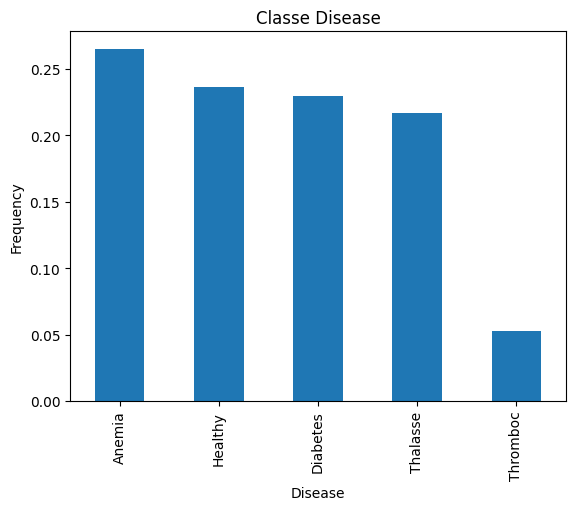

In [52]:
# Plot class Disease
df2["Disease"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Disease",
    ylabel="Frequency",
    title="Classe Disease"
);

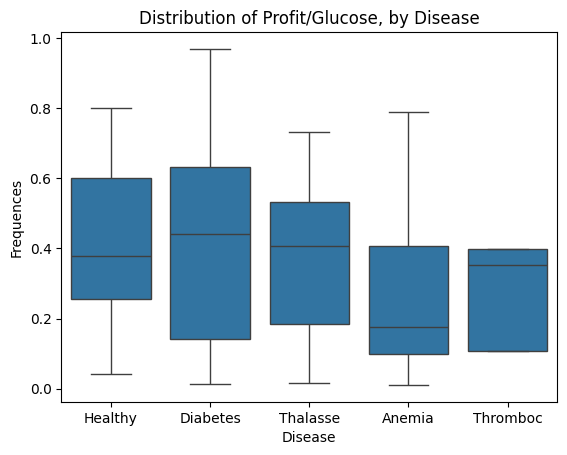

In [54]:
# Create boxplot
sns.boxplot(x ="Disease", y = "Glucose", data= df2)
plt.xlabel("Disease")
plt.ylabel("Frequences")
plt.title("Distribution of Profit/Glucose, by Disease");

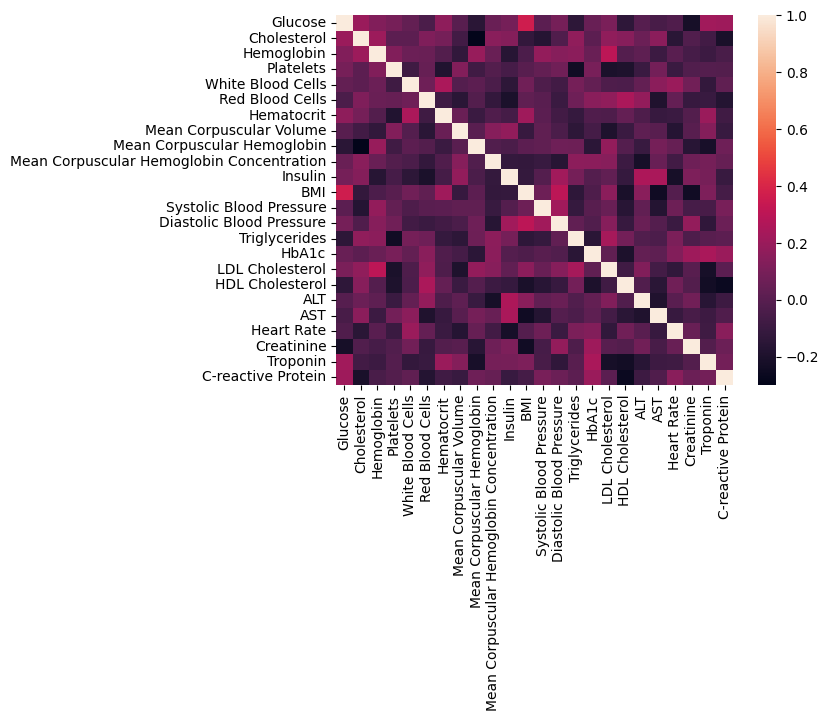

In [57]:
# Plot a correlation heatmap of features in the training data
corr = df2.drop(columns="Disease").corr()
sns.heatmap(corr);

## Split

In [ ]:
target= "Disease"
X_train= df2.drop(columns="Disease")
y_train= df2[target]
X_test= df1.drop(columns="Disease")
y_test=df1["Disease"]

In [ ]:
y_test.shape

(486,)

In [ ]:
#Instantiate
ohe = OneHotEncoder(use_cat_names=True)
#Fit
ohe.fit(y_train)
#transform
Y_train =ohe.transform(y_train)
print(Y_train.shape)
Y_train.head()

(1880, 5)


,Disease_Thalasse,Disease_Diabetes,Disease_Thromboc,Disease_Anemia,Disease_Healthy
564,1,0,0,0,0
297,1,0,0,0,0
932,1,0,0,0,0
239,1,0,0,0,0
99,1,0,0,0,0


In [ ]:
#Instantiate
ohe = OneHotEncoder(use_cat_names=True)
#Fit
ohe.fit(y_test)
#transform
yT_test =ohe.transform(y_test)
print(yT_test.shape)
yT_test.head()

(486, 6)


,Disease_Thalasse,Disease_Diabetes,Disease_Heart Di,Disease_Anemia,Disease_Thromboc,Disease_Healthy
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0


In [ ]:
yT_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Disease_Thalasse  486 non-null    int64
 1   Disease_Diabetes  486 non-null    int64
 2   Disease_Heart Di  486 non-null    int64
 3   Disease_Anemia    486 non-null    int64
 4   Disease_Thromboc  486 non-null    int64
 5   Disease_Healthy   486 non-null    int64
dtypes: int64(6)
memory usage: 22.9 KB


In [ ]:
yT_test= y_test
Y_train= y_train


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size= 0.2, random_state= 42
)

In [ ]:
X_train, X_test, Y_train, yT_test = train_test_split(
    X_train, Y_train, test_size= 0.2, random_state= 42
)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(
    #X_train, y_train, test_size= 0.2, random_state= 42
#)

# Build model

##Baseline

In [ ]:
#Build model
acc_baseline = Y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))


Baseline Accuracy: 0.26


##Iterate

In [ ]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(),DecisionTreeClassifier(max_depth=7, random_state=42)

)

In [ ]:
model.fit(X_train, Y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, random_state=42))])

In [ ]:
# Build Model
#model = make_pipeline(
    #OrdinalEncoder(),DecisionTreeClassifier(max_depth=d, random_state=42)

#)
# Fit model to training data
#model.fit(X_train, Y_train,)

In [ ]:
model.predict(X_train)

array(['Anemia', 'Thalasse', 'Diabetes', ..., 'Diabetes', 'Diabetes',
       'Anemia'], dtype=object)

In [ ]:
acc_train = accuracy_score(Y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 1.0


In [ ]:
#print(model.get_depth())
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 7


In [ ]:
#tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
#print("Tree Depth:", tree_depth)

# a range of possible values for max_depth hyperparameter of our model

In [ ]:
depth_hyperparams = range(1, 8, 2)

In [ ]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model =  make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, Y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, Y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:4])
print("Validation Accuracy Scores:", validation_acc[:4])

Training Accuracy Scores: [0.3783244680851064, 0.682845744680851, 0.9035904255319149, 1.0]
Validation Accuracy Scores: [0.37154989384288745, 0.6602972399150743, 0.8768577494692145, 1.0]


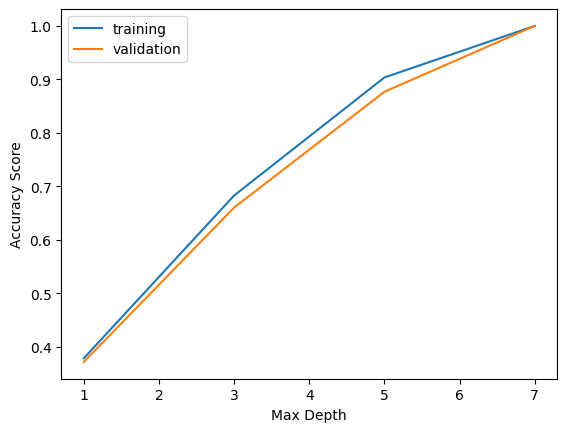

In [ ]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

#Evaluate

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#evaluate
train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = model.score(X_test, yT_test)
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(test_acc, 2))

Training Accuracy: 1.0
Test Accuracy: 1.0


#Communicate

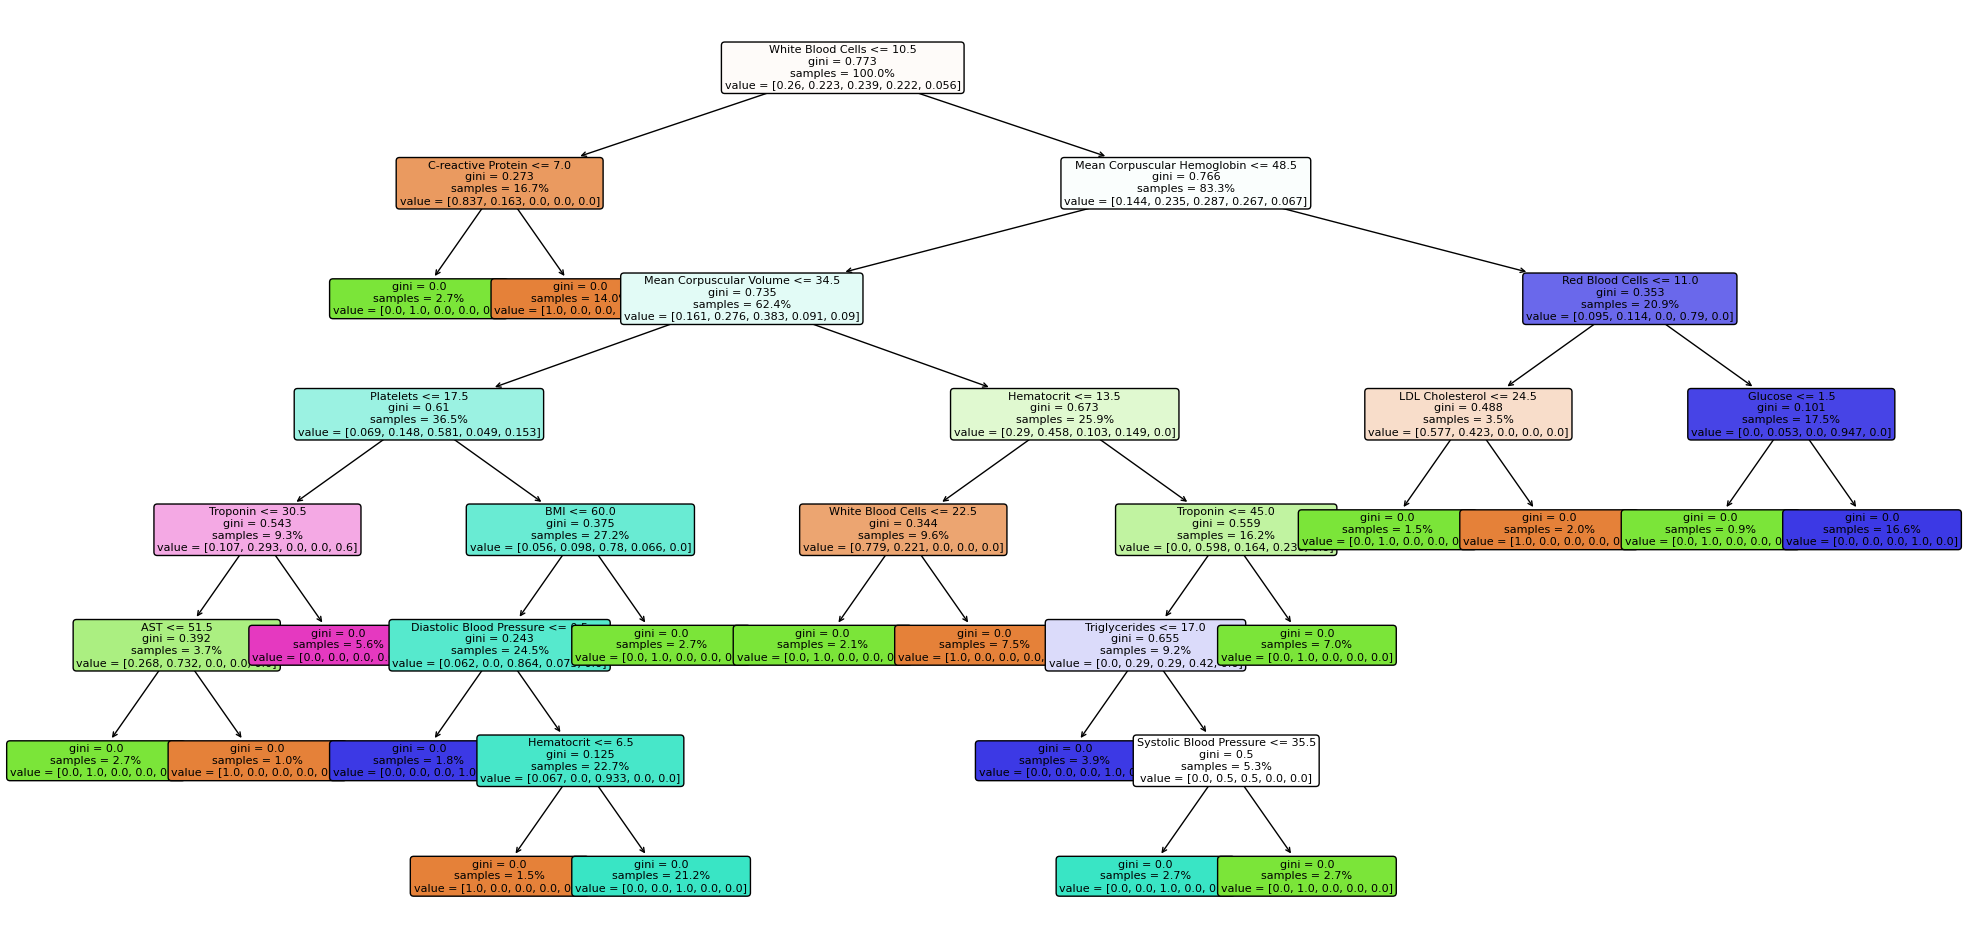

In [ ]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=7,  # Only display first 3 levels
    #class_names=['0','1'],
    fontsize=8,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#metrics score
print(classification_report(yT_test, y_pred))

              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00        98
    Diabetes       1.00      1.00      1.00        92
     Healthy       1.00      1.00      1.00        95
    Thalasse       1.00      1.00      1.00        72
    Thromboc       1.00      1.00      1.00        19

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [ ]:
#print(classification_report(y_train, model.predict(X_train)))

In [ ]:
yT_test.value_counts()

Disease
Anemia      98
Healthy     95
Diabetes    92
Thalasse    72
Thromboc    19
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    )

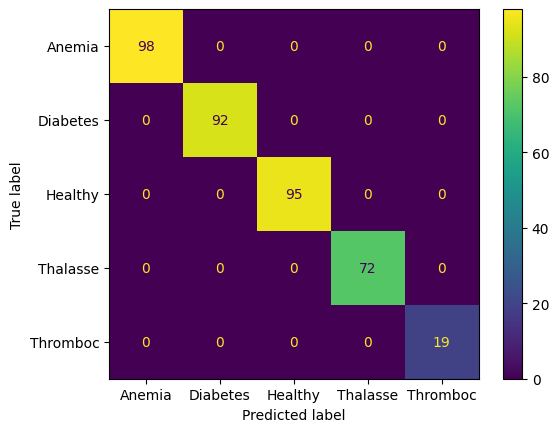

In [ ]:
#Get confusionMatrix
ConfusionMatrixDisplay.from_estimator(model, X_test, yT_test);

In [ ]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['Glucose', 'Cholesterol', 'Hemoglobin'], dtype='object')
Importances: [0.02279936 0.         0.        ]


In [ ]:
feat_imp = pd.Series((importances), index= features).sort_values()
feat_imp.head(5)

Cholesterol    0.0
Hemoglobin     0.0
Creatinine     0.0
Heart Rate     0.0
ALT            0.0
dtype: float64

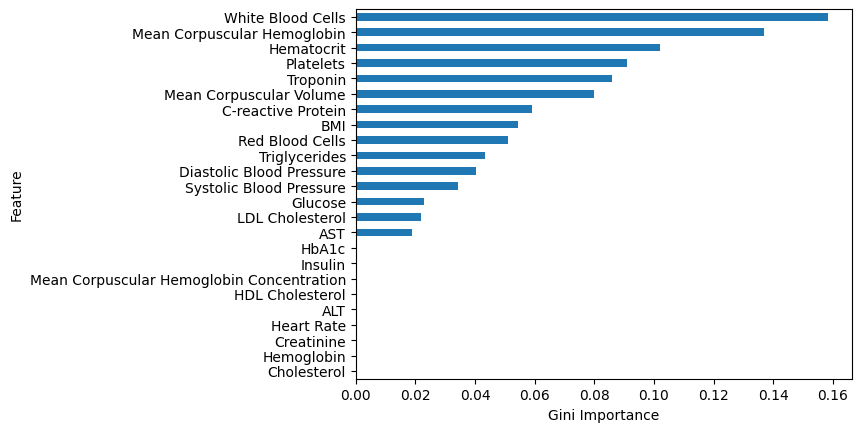

In [ ]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

# With Entropy

In [ ]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(),DecisionTreeClassifier(criterion= 'entropy', max_depth=7, random_state=42)

)

In [ ]:
model.fit(X_train, Y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        random_state=42))])

In [ ]:
#print(model.get_depth())
#print(model.get_depth())
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 7


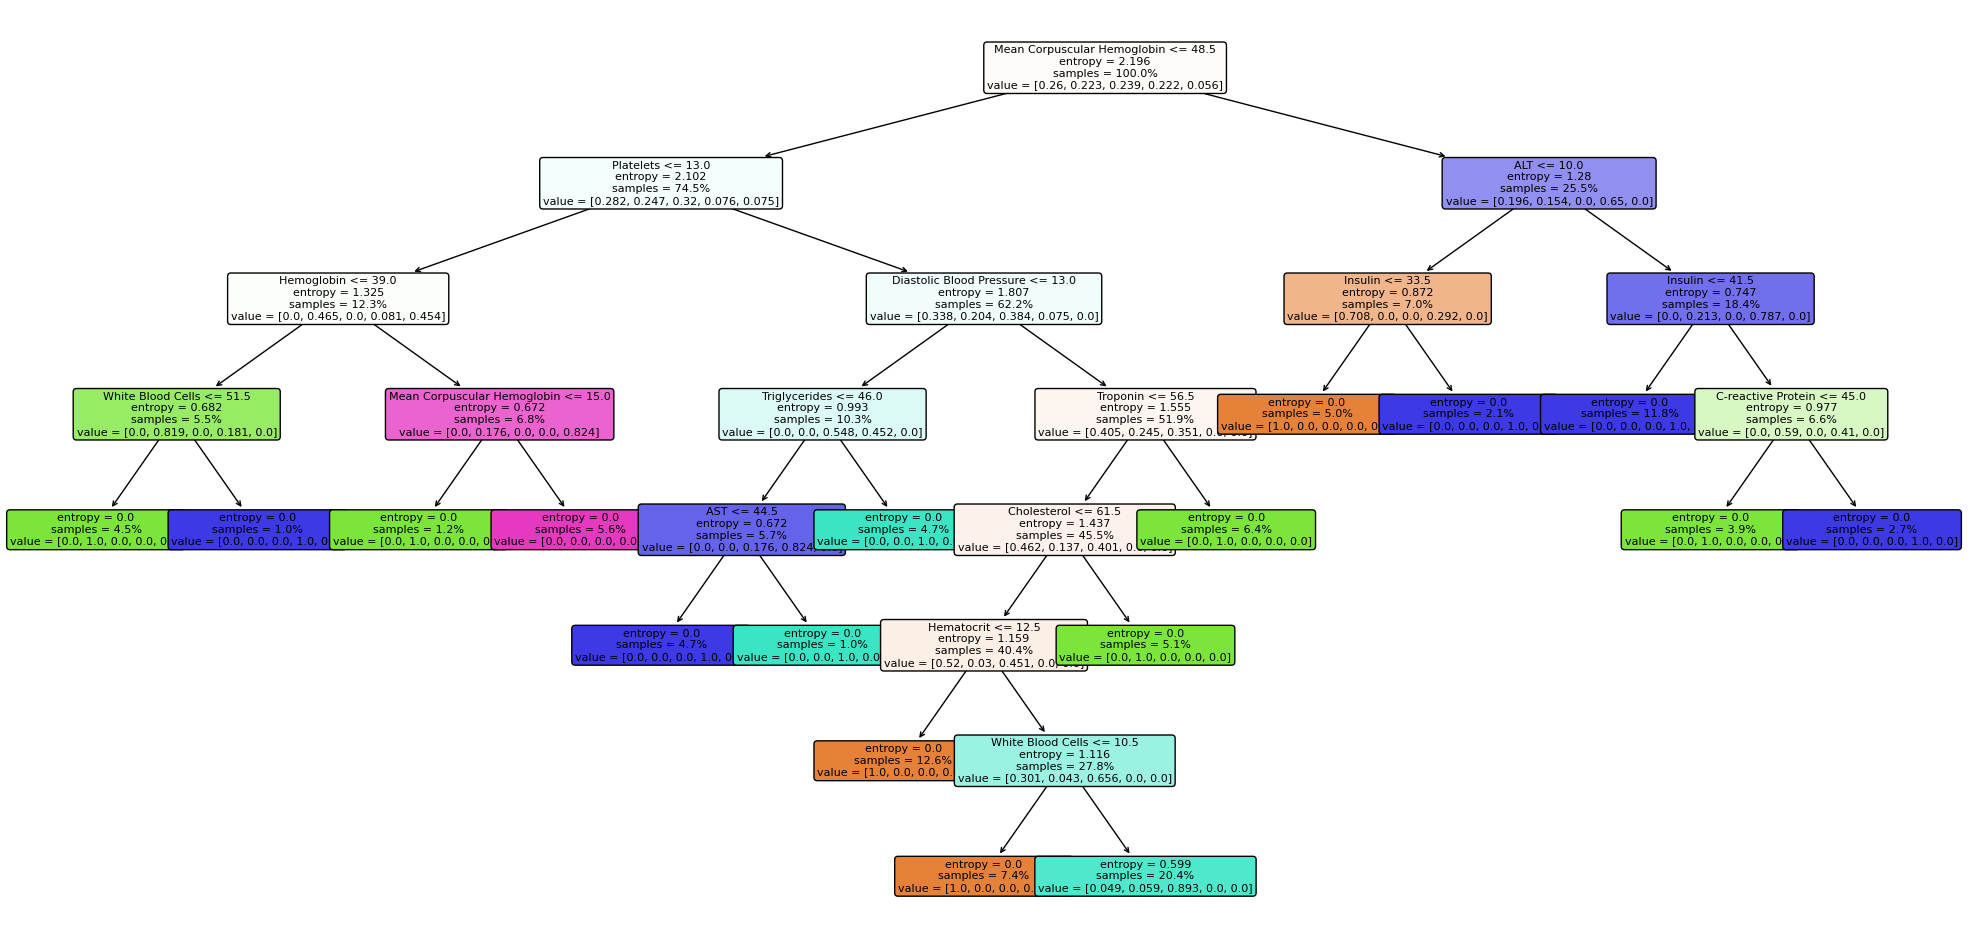

In [ ]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=7,  # Only display first 3 levels
    #class_names=['0','1'],
    fontsize=8,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
#metrics score
print(classification_report(yT_test, y_pred))

              precision    recall  f1-score   support

      Anemia       1.00      0.86      0.92        98
    Diabetes       1.00      0.89      0.94        92
     Healthy       0.80      1.00      0.89        95
    Thalasse       1.00      1.00      1.00        72
    Thromboc       1.00      1.00      1.00        19

    accuracy                           0.94       376
   macro avg       0.96      0.95      0.95       376
weighted avg       0.95      0.94      0.94       376



In [ ]:
yT_test.value_counts()

Disease
Anemia      98
Healthy     95
Diabetes    92
Thalasse    72
Thromboc    19
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    )

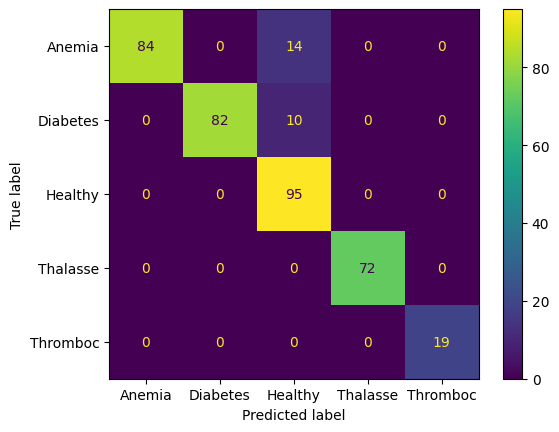

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, yT_test);

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [ ]:
print(classification_report(y_train, model.predict(X_train)))

In [ ]:
class_labels = ["Anemia", "Diabetes", "Healthy", "Thalasse", "Thromboc"]